<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/codigo/beetweeness_closeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.9 MB/s eta 0:00:00


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#LENDO A REDE DE UMA EDGELIST
G = nx.read_edgelist('/content/drive/MyDrive/redes_complexas/FacebookData/facebook_combined.txt',create_using=nx.Graph(), nodetype = int)

In [5]:
#ADICIONANDO A PROPRIEDADE GRAU ÀS ÀRESTAS
graus = list(G.degree)
nx.set_node_attributes(G, graus, "grau")

In [7]:
#DATAFRAME QUE ARMAZENARÁ AS MÉTRICAS DE CENTRALIDADE DA REDE
metricas = pd.DataFrame(columns = ['vertice', 'grau', 'betweenness', 'closeness', 'autovetor'])

In [8]:
metricas['vertice'] = list(G.nodes)
metricas['grau'] = [grau[1] for grau in G.degree]
metricas['clustering'] = nx.clustering(G)

In [20]:
#DEMORA PARA RODAR
metricas['betweenness'] = nx.closeness_centrality(G)
metricas['closeness'] = nx.betweenness_centrality(G)
metricas['autovetor'] = nx.eigenvector_centrality(G)

In [22]:
metricas.to_csv('/content/drive/MyDrive/redes_complexas/FacebookData/metricas_FacebookCombined.csv')

In [23]:
metricas

,vertice,grau,betweenness,closeness,autovetor,clustering
0,0,347,0.353343,1.463059e-01,3.391796e-05,0.041962
1,1,17,0.261376,2.783274e-06,6.045346e-07,0.419118
2,2,10,0.261258,7.595021e-08,2.233461e-07,0.888889
3,3,17,0.261376,1.685066e-06,6.635648e-07,0.632353
4,4,10,0.261258,1.840332e-07,2.236416e-07,0.866667
...,...,...,...,...,...,...
4034,4034,2,0.183989,0.000000e+00,2.951270e-10,1.000000
4035,4035,1,0.183980,0.000000e+00,2.912901e-10,0.000000
4036,4036,2,0.183989,0.000000e+00,2.931223e-10,1.000000
4037,4037,4,0.184005,7.156847e-08,2.989233e-10,0.666667


### VISUALIZAÇÃO DOS DADOS

<Axes: xlabel='vertice'>

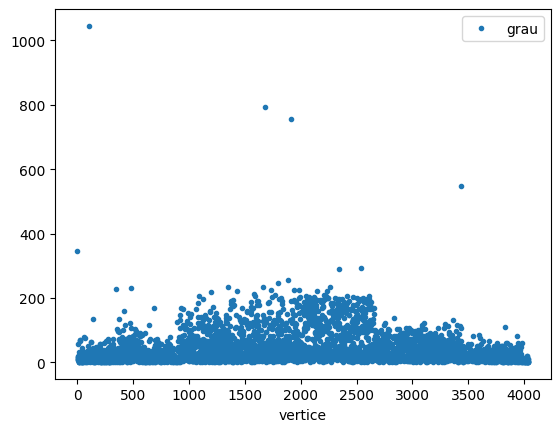

In [29]:
metricas.plot(x= 'vertice', y= 'grau', style = '.')

In [36]:
metricas['grau'].describe()

count    4039.000000
mean       43.691013
std        52.420605
min         1.000000
25%        11.000000
50%        25.000000
75%        57.000000
max      1045.000000
Name: grau, dtype: float64

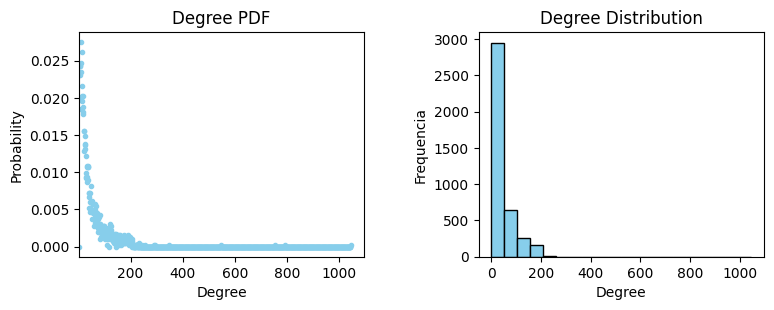

In [62]:
# Calculate the frequency counts
degree_counts = nx.degree_histogram(G)

# Normalize the frequency counts to get probabilities
total_nodes = G.order()
degree_probs = [count / total_nodes for count in degree_counts]


# Plot the PDF
fig = plt.figure(figsize=(14,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.plot(degree_probs, '.', color='skyblue')
plt.title('Degree PDF')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xlim(left=1)

#plot the histogram
plt.subplot(232)
plt.hist(metricas['grau'], bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequencia')
plt.show()

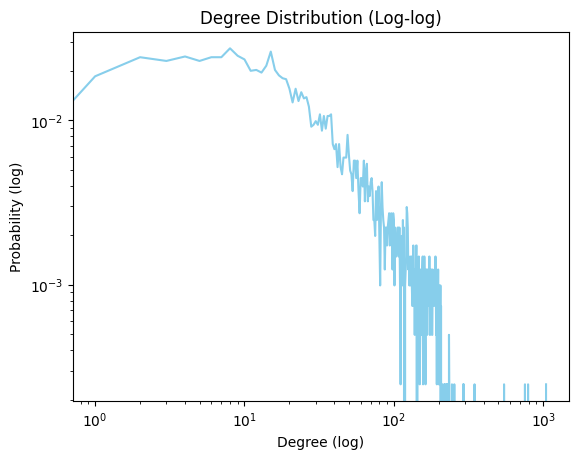

In [65]:
# Plot the degree distribution on a log-log scale
plt.loglog(range(len(degree_probs)), degree_probs, '-', color='skyblue')
plt.title('Degree Distribution (Log-log)')
plt.xlabel('Degree (log)')
plt.ylabel('Probability (log)')
plt.show()

### PLORANDO A REDE

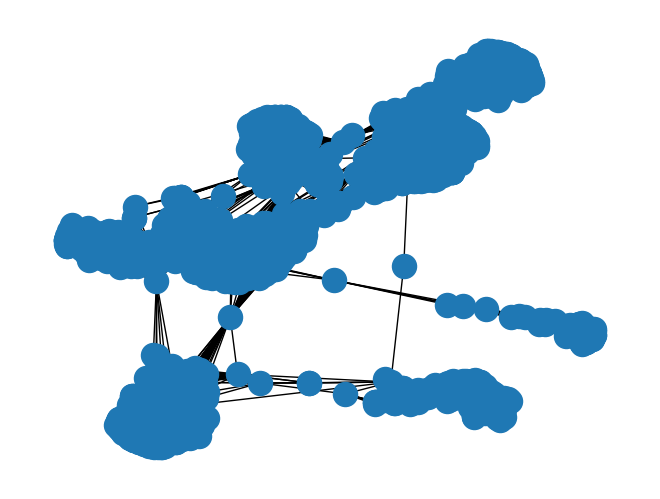

In [66]:
nx.draw(G)

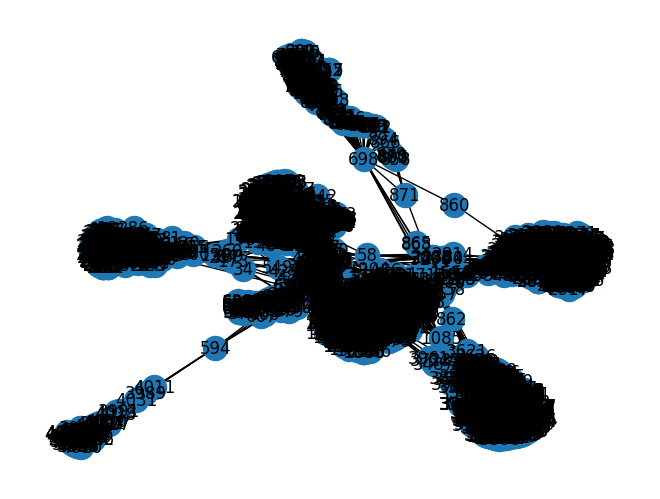

In [67]:
nx.draw(G, with_labels= True)

In [71]:
metricas['grau_relativo'] = metricas['grau'] / max(metricas['grau'])

In [72]:
metricas

,vertice,grau,betweenness,closeness,autovetor,clustering,grau_relativo
0,0,347,0.353343,1.463059e-01,3.391796e-05,0.041962,0.332057
1,1,17,0.261376,2.783274e-06,6.045346e-07,0.419118,0.016268
2,2,10,0.261258,7.595021e-08,2.233461e-07,0.888889,0.009569
3,3,17,0.261376,1.685066e-06,6.635648e-07,0.632353,0.016268
4,4,10,0.261258,1.840332e-07,2.236416e-07,0.866667,0.009569
...,...,...,...,...,...,...,...
4034,4034,2,0.183989,0.000000e+00,2.951270e-10,1.000000,0.001914
4035,4035,1,0.183980,0.000000e+00,2.912901e-10,0.000000,0.000957
4036,4036,2,0.183989,0.000000e+00,2.931223e-10,1.000000,0.001914
4037,4037,4,0.184005,7.156847e-08,2.989233e-10,0.666667,0.003828


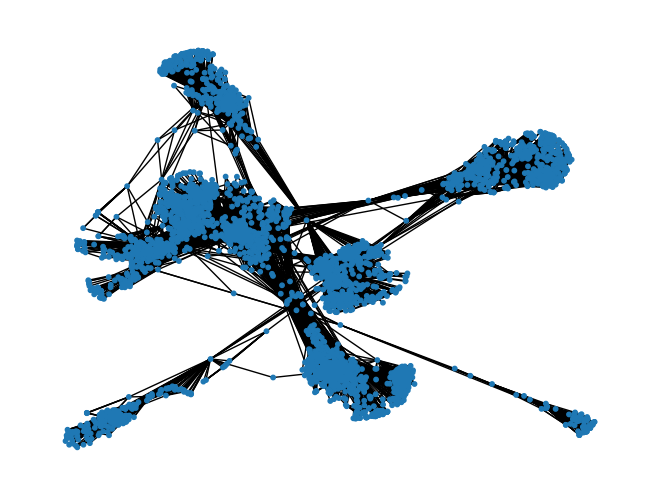

In [76]:
node_size = 10 + metricas['grau_relativo']

# Desenha o grafo
pos = nx.spring_layout(G)  # Define o layout do grafo
nx.draw(G, pos, with_labels=False, node_size=node_size)

# Exibe o gráfico
plt.show()

In [95]:
from matplotlib.colors import LinearSegmentedColormap

# Define the starting and ending colors
start_color = 'green'
end_color = 'blue'

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_gradient', [start_color, end_color], N=4039)

# Convert colormap to a list of floats
colors = [cmap(i) for i in np.linspace(0, 1, 4039)]

# Convert RGB colors to floats
colors_float = [(r/255, g/255, b/255) for r, g, b, _ in colors]

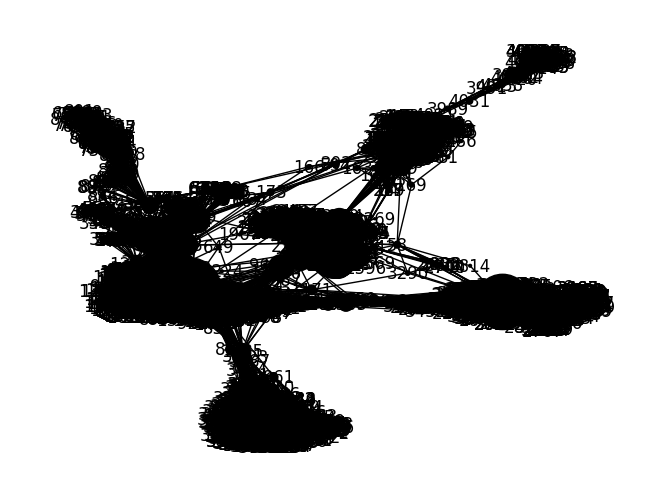

In [96]:
d = d = dict(G.degree)

nx.draw(G, nodelist=d.keys(),
        with_labels= True,
        node_size=[v * 2 for v in d.values()],
        node_color = colors_float
        )

plt.show()